In [1]:
import pandas as pd
import numpy as np
import scipy
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
from scipy import stats
from scipy.stats import mstats
import math
import statsmodels.api as sm 

import matplotlib.pyplot as pyplot

from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv (r"C:\Data\ex10_1.txt", sep = " ")
print(data)

  gender  height  weight  age
0      M      68     155   23
1      F      61      99   20
2      F      63     115   21
3      M      70     205   45
4      M      69     170   38
5      F      65     125   30
6      M      72     220   48


In [3]:
data.gender = data.gender.astype('category')

In [4]:
#correlation between weight and height
print( scipy.stats.pearsonr(data['weight'], data['height']) )

(0.9716498256927286, 0.00025598539082999355)


In [5]:
#correlation between weight nand height also can be computed as
print( np.corrcoef(data['weight'], data['height']) )

[[1.         0.97164983]
 [0.97164983 1.        ]]


In [6]:
# MATRIX OF CORRELATION
quant = ['weight','height','age']
corr_matrix = data.loc[:,quant].corr()
print(corr_matrix)

          weight    height       age
weight  1.000000  0.971650  0.923965
height  0.971650  1.000000  0.873101
age     0.923965  0.873101  1.000000


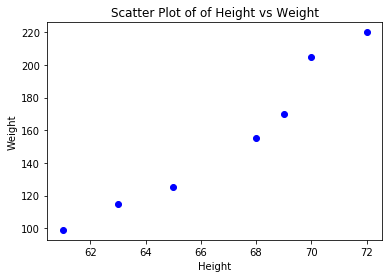

In [7]:
#scatter plot of height and weight
import matplotlib.pyplot as pyplot

pyplot.scatter(data['height'], data['weight'],label='Scatter Plot HW',color='b')  
pyplot.xlabel('Height') 
pyplot.ylabel('Weight') 
pyplot.title('Scatter Plot of of Height vs Weight') 
pyplot.show() 

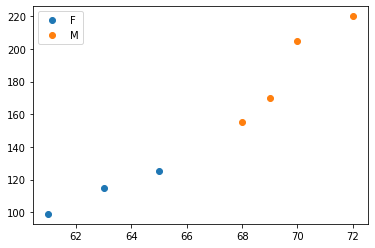

In [8]:
#scatter plot of height and weight classified by gender

groups = data.groupby("gender")
for name, group in groups:
    pyplot.plot(group["height"], group["weight"], marker="o", linestyle="", label=name)
    
pyplot.legend()
pyplot.show()

# LINEAR REGRESSION MODEL
First way

In [9]:
# simple model weight ~ height
# model1

model=ols("weight~height",data=data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     84.45
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           0.000256
Time:                        15:53:31   Log-Likelihood:                -26.068
No. Observations:                   7   AIC:                             56.14
Df Residuals:                       5   BIC:                             56.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -592.6446     81.542     -7.268      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [10]:
# Derive information of model like SE of beta, MS-res, Residual standard error:

print(model.bse) # standard error for the coefficients
print('Mean Squared errors, MS-Res = ',model.mse_resid) # another name is residual mean square
print('Residual Standard Error = ', np.sqrt(model.mse_resid) )
print('MS-res = ', model.scale) # MS_res


Intercept    81.542175
height        1.217803
dtype: float64
Mean Squared errors, MS-Res =  140.67740963855402
Residual Standard Error =  11.860750804167248
MS-res =  140.67740963855402


# Linear model fitting
Second way

In [11]:
# SECOND WAY TO FIT A LINEAR MODEL (SIMILAR output AS THE FIRST WAY ABOVE)
# maybe less commonly used compared to the first way above
import statsmodels
weight = data['weight']
n = len(weight) # data size
inter = [1]*n 
X = np.column_stack((inter, data['height'])) 
# X = matrix of 2 columns in the model, including column of value 1 for intercept and column of height

mo = statsmodels.regression.linear_model.OLS(weight, X) # command to form the model is different from the first way
re =mo.fit()
print(re.summary())

# BIG note: the name of variable is not shown in the output.
# we need to figure out the name based on the matrix X

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     84.45
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           0.000256
Time:                        15:53:55   Log-Likelihood:                -26.068
No. Observations:                   7   AIC:                             56.14
Df Residuals:                       5   BIC:                             56.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -592.6446     81.542     -7.268      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [12]:
# Derive information of model from SECOND WAY of fitting  model

print(re.bse) # standard error for the coefficients
print('Mean Squared errors, MS-Res = ',re.mse_resid)
print('Residual Standard Error = ', np.sqrt(re.mse_resid) )

const    81.542175
x1        1.217803
dtype: float64
Mean Squared errors, MS-Res =  140.67740963855402
Residual Standard Error =  11.860750804167248


In [13]:
# ANOVA of MODEL 1

from statsmodels.formula.api import ols
anova11 = sm.stats.anova_lm(model, typ=1) #Anova of model 1 with typ = 1
anova12 = sm.stats.anova_lm(model, typ=2) #Anova of model 1 with typ = 2
# in the case of a simple model, the two anova tables (typ = 1 and typ = 2) are the same.
print(anova11)
print(anova12)

           df        sum_sq       mean_sq          F    PR(>F)
height    1.0  11880.327238  11880.327238  84.450853  0.000256
Residual  5.0    703.387048    140.677410        NaN       NaN
                sum_sq   df          F    PR(>F)
height    11880.327238  1.0  84.450853  0.000256
Residual    703.387048  5.0        NaN       NaN


# Multiple Linear Regression Model (with >= 2 regressors)

# (MLR)

In [14]:
# MODEL 2: weight ~ height + age

model2=ols("weight~height + age",data=data).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     60.81
Date:                Wed, 01 Dec 2021   Prob (F-statistic):            0.00101
Time:                        15:54:12   Log-Likelihood:                -24.098
No. Observations:                   7   AIC:                             54.20
Df Residuals:                       4   BIC:                             54.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -419.0416    121.274     -3.455      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


# ANOVA for the MLR
with "typ = 1"

In [15]:
from statsmodels.formula.api import ols

anova21 = sm.stats.anova_lm(model2, typ=1) 
# Anova of model 2 with typ = 1 #the sum_sq are in a sequential manner, 
# hence if we swop the order of regressors, the table will change;
# 'typ = 1' will give you the same as anova(model1) table in R
print(anova21)


           df        sum_sq       mean_sq           F    PR(>F)
height    1.0  11880.327238  11880.327238  118.602673  0.000404
age       1.0    302.710505    302.710505    3.021994  0.157134
Residual  4.0    400.676543    100.169136         NaN       NaN


# ANOVA
with "typ = 2"

In [16]:
anova22 = sm.stats.anova_lm(model2, typ=2) 
# Anova of model 2 with typ = 2, gives p-values for testing the sig of a regressor given all other regressors, 
# hence the p-value here is similar to the p-value from t-test from summary(model) in R.
print(anova22)

               sum_sq   df          F    PR(>F)
height    1440.170532  1.0  14.377388  0.019240
age        302.710505  1.0   3.021994  0.157134
Residual   400.676543  4.0        NaN       NaN


# ANOVA
with "typ = 3"

In [17]:
print(sm.stats.anova_lm(model2, typ=3) ) # similar as typ = 2 but has the intercept included
# the sum_sq and p-value in this table is similar as the Type II (SS2) in SAS.

                sum_sq   df          F    PR(>F)
Intercept  1195.949411  1.0  11.939300  0.025928
height     1440.170532  1.0  14.377388  0.019240
age         302.710505  1.0   3.021994  0.157134
Residual    400.676543  4.0        NaN       NaN


# Categorical variable in the model

If a categorical variable is included in the model, and we let Python to choose the reference category, then we do  not need to create indicator for the categorical variable.

However, if we specifically want a category tobe the reference, then we must create the indicator manually.

In [18]:
# MODEL 3: weight ~ height + age + gender

model3=ols("weight~height + age + gender",data=data).fit() # gender is added after age
print(model3.summary())

# gender[T.M] means Male is chosen in the model, and Female is the REFERENCE.


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     35.16
Date:                Wed, 01 Dec 2021   Prob (F-statistic):            0.00774
Time:                        15:54:28   Log-Likelihood:                -23.605
No. Observations:                   7   AIC:                             55.21
Df Residuals:                       3   BIC:                             54.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -254.1068    277.360     -0.916      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [19]:
# ANOVA of MODEL 3 (which uses gender)

anova31 = sm.stats.anova_lm(model3, typ=1) #Anova of model 3 with typ = 1
anova32 = sm.stats.anova_lm(model3, typ=2 ) #Anova of model 3 with typ = 2
print(anova31)
print(anova32)

# variable gender (or any categorical variable) will appear in the first row(s) of the anova table



           df       sum_sq      mean_sq          F    PR(>F)
gender    1.0  9514.714286  9514.714286  82.024838  0.002843
height    1.0  2376.134328  2376.134328  20.484276  0.020176
age       1.0   344.871775   344.871775   2.973085  0.183128
Residual  3.0   347.993896   115.997965        NaN       NaN
              sum_sq   df         F    PR(>F)
gender     52.682647  1.0  0.454169  0.548641
height    144.720939  1.0  1.247616  0.345406
age       344.871775  1.0  2.973085  0.183128
Residual  347.993896  3.0       NaN       NaN


# Indicator for Categorical variable

If gender is used in the model, but we specifically want a specific category tobe the **reference**, then we need to create indicator(s) manually

In [20]:
#create indicator variable for gender:
dummy = pd.get_dummies(data['gender']).values
print(dummy)
print(dummy[:, 1]) # choose this in the model if we want M = 1 and F = 0 (F = 0 means reference)
#print(dummy[:, 0]) # choose this in the model if we want F = 1 and M = 0.

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]]
[1 0 0 1 1 0 1]


In [21]:
# MODEL 3 weight ~ height + age + gender but create indicator for gender manually
mod3 = ols('weight ~ height  +  age + dummy[:, 1] ' , data = data).fit()
print(mod3.summary())

# model3 and mod3 have the same set of coefficients.
# model3 uses orginal gender while mod3 uses created dummy for gender.

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     35.16
Date:                Wed, 01 Dec 2021   Prob (F-statistic):            0.00774
Time:                        15:55:13   Log-Likelihood:                -23.605
No. Observations:                   7   AIC:                             55.21
Df Residuals:                       3   BIC:                             54.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -254.1068    277.360     -0.916      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [22]:
# ANOVA of MODEL 3 (which uses dummy for gender)

anova31 = sm.stats.anova_lm(mod3, typ=1) #Anova of model 3 with typ = 1
anova32 = sm.stats.anova_lm(mod3, typ=2 ) #Anova of model 3 with typ = 2
print(anova31)
print(anova32)

# take note: indicator "dummy[:, 1]" for gender will appear at the last row, bcz we add it at the last in the model. 
# This is defferent compared to when we use "gender" in "model3".

              df        sum_sq       mean_sq           F    PR(>F)
height       1.0  11880.327238  11880.327238  102.418410  0.002055
age          1.0    302.710505    302.710505    2.609619  0.204631
dummy[:, 1]  1.0     52.682647     52.682647    0.454169  0.548641
Residual     3.0    347.993896    115.997965         NaN       NaN
                 sum_sq   df         F    PR(>F)
height       144.720939  1.0  1.247616  0.345406
age          344.871775  1.0  2.973085  0.183128
dummy[:, 1]   52.682647  1.0  0.454169  0.548641
Residual     347.993896  3.0       NaN       NaN


In [23]:
# STILL MODEL 3 but....we swop gender (dummy[:, 1]) to be added before age

mod3 = ols('weight ~ height  + dummy[:, 1]  + age' , data = data).fit() 

print(sm.stats.anova_lm(mod3, typ=1) ) # Anova of model 3 with typ = 1
print(sm.stats.anova_lm(mod3, typ=2 ) ) # Anova of model 3 with typ = 2

# the dummy variable for gender will appear at the second row as its position in the model
# typ = 1 gives a table the same as anova table of model: lm(weight ~ height + gender + age) in R
# typ = 1: helps to test the significance of a variable in the model WITHOUT the presence of variable below it.
# typ = 2 gives p-values the same as from t-test of model: lm(weight ~ height + gender + age) in R. 
# typ = 2: This can help to test the significance of a variable in the model WITH the presence of all other variables


              df        sum_sq       mean_sq           F    PR(>F)
height       1.0  11880.327238  11880.327238  102.418410  0.002055
dummy[:, 1]  1.0     10.521377     10.521377    0.090703  0.782953
age          1.0    344.871775    344.871775    2.973085  0.183128
Residual     3.0    347.993896    115.997965         NaN       NaN
                 sum_sq   df         F    PR(>F)
height       144.720939  1.0  1.247616  0.345406
dummy[:, 1]   52.682647  1.0  0.454169  0.548641
age          344.871775  1.0  2.973085  0.183128
Residual     347.993896  3.0       NaN       NaN


# Model with interaction term

In [24]:
# MODEL 4: Model with interaction term height*gender

model4=ols("weight~height + age + gender + height*gender",data=data).fit() 
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     33.99
Date:                Wed, 01 Dec 2021   Prob (F-statistic):             0.0288
Time:                        15:55:24   Log-Likelihood:                -21.344
No. Observations:                   7   AIC:                             52.69
Df Residuals:                       2   BIC:                             52.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -186.6079    250

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [25]:
# ANOVA of MODEL 4

print(sm.stats.anova_lm(model4, typ=1) ) # Anova of model 4 with typ = 1
print(sm.stats.anova_lm(model4, typ=2 ) ) # Anova of model 4 with typ = 2

                df       sum_sq      mean_sq           F    PR(>F)
gender         1.0  9514.714286  9514.714286  104.327110  0.009450
height         1.0  2376.134328  2376.134328   26.053880  0.036305
height:gender  1.0   448.294243   448.294243    4.915465  0.156915
age            1.0    62.169859    62.169859    0.681681  0.495818
Residual       2.0   182.401570    91.200785         NaN       NaN
                   sum_sq   df         F    PR(>F)
gender          52.682647  1.0  0.577656  0.526607
height         144.720939  1.0  1.586839  0.334864
height:gender  165.592326  1.0  1.815690  0.310182
age             62.169859  1.0  0.681681  0.495818
Residual       182.401570  2.0       NaN       NaN


# Prediction

In [26]:
# predicted values of MODEL 1 (simple model weight ~ height)
fitted = model.fittedvalues
print(fitted)

0    168.361446
1     90.022590
2    112.405120
3    190.743976
4    179.552711
5    134.787651
6    213.126506
dtype: float64


# Residuals Analysis

In [27]:
# the RAW residuals of MODEL 1: 
# model=ols("weight~height",data=data).fit()
print(model.resid)


0   -13.361446
1     8.977410
2     2.594880
3    14.256024
4    -9.552711
5    -9.787651
6     6.873494
dtype: float64


In [28]:
analysis = model.get_influence() 
# many information about model stored in this object "analysis"
# the standardized residuals:
SR = analysis.resid_studentized_internal
print(SR)

[-1.22668004  1.07528838  0.26143431  1.38511323 -0.89559435 -0.91086091
  0.76205059]


In [29]:
# leverage (hat values)
leverage = analysis.hat_matrix_diag
print(leverage)

[0.15662651 0.50451807 0.2996988  0.24698795 0.19126506 0.17921687
 0.42168675]


In [30]:
#Cook's distance values (and p-values) as tuple of arrays
cooks_d, p = analysis.cooks_distance
print(cooks_d)

[0.13972622 0.58866582 0.01462498 0.31464034 0.09484668 0.09057839
 0.21172123]


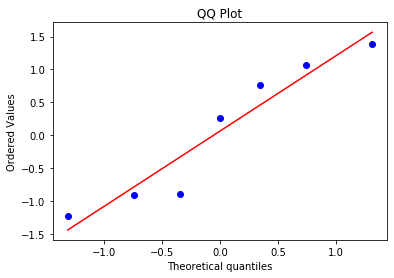

In [31]:
######################  QQ PLOTS of standardized residuals
import matplotlib.pyplot as pyplot

scipy.stats.probplot(SR, dist="norm", plot=pyplot)
pyplot.title('QQ Plot') 
pyplot.show()

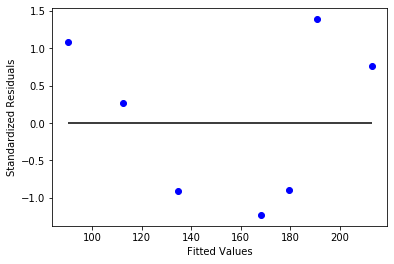

In [32]:
import matplotlib.pyplot as pyplot
pyplot.scatter(model.fittedvalues, SR,color='b')  
pyplot.xlabel('Fitted Values') 
pyplot.ylabel('Standardized Residuals') 
pyplot.hlines(0, xmin = min(fitted), xmax = max(fitted) )
pyplot.title('') 
pyplot.show() 